
# Project: TMDb movie data.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. we will analyze this dataset and in particular we are interested in finding trends and patterns among the revenue whether it is high or low depending on the dataset that we have.

**dataset columns:**
    <br>
    1-id
    <br>
    2-imdb_id
    <br>
    3-popularity
    <br>
    4-budget
    <br>
    5-revenue
    <br>
    6-original_title
    <br>
    7-cast
    <br>
    8-homepage
    <br>
    9-director
    <br>
    10-tagline
    <br>
    11-keywords
    <br>
    12-overview
    <br>
    13-runtime
    <br>
    14-genres
    <br>
    15-production_companies
    <br>
    16-release_date
    <br>
    17-vote_count
    <br>
    18-vote_average
    <br>
    19-release_year
    <br>
    20-budget_adj
    <br>
    21-revenue_adj
    
    
 >We will use these data columns gathered about the movies in to investigate questions of interest.
 <br>
 **These questions are :**
 <br>
 Q1. Does the vote counts affects the revenue? 
 <br>
 Q2. Is there a relation between the budget and the revenue? 
 <br>
 Q3. Which genres are most popular from year to year? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01   21% |███████                         | 2.3MB 14.7MB/s eta 0:00:01    48% |███████████████▍                | 5.0MB 28.7MB/s eta 0:00:01    73% |███████████████████████▌        | 7.7MB 28.3MB/s eta 0:00:01    99% |███████████████████████████████▉| 10.4MB 27.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01  8% |██▉                             | 1.2MB 24.6MB/s eta 0:00:01    28% |█████████                       | 3.8MB 26.9MB/s eta 0:00:01    47% |███████████████▏                | 6.4MB 25.4MB/s eta 0:00:01    84% |███████████████████████████▏    | 11.4MB 24.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:


<a id='wrangling'></a>
## Data Wrangling



In [34]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv(r'tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [35]:
df.shape

(10866, 21)

In [36]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Checking for the missing values in each column
> it was found the the columns **imdb_id , cast , homepage , tagline , director , keywords , overview and production_companies** contains missing values so we need to either drop them or replace them

In [37]:
# types and look for instances of missing or possibly errant data.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


## observations while cleaning the data.
#### unuseful and irrelevant columns for investigation
>some columns are very useful as it does note make any changes in our investigation on the revenues.So i decided to drop some columns that will not make any changes in our analysis like : **id** , **imdb_id** , **original_title** , **cast** , **homepage** , **director , tagline ,keywords , overview , production_companies , release_date** . not only they  dont make any changes on the revenue analysis it have alot of missing values that will ruin the dataset


 

In [38]:
#taking a copy from the data frame to avoid any ruining in the original dataframe
df1 = df.copy()

In [39]:
#droping the unwanted columns 
df1 = df1.drop(columns=[ 'id' , 'imdb_id' , 'original_title' , 'cast' , 'homepage' , 'director' , 'tagline' , 'keywords' , 'overview' , 'production_companies' , 'release_date'], axis=1)

In [40]:
#reviewing the data after droping 
df1.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [41]:
df1.isnull().sum()

popularity       0
budget           0
revenue          0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

## The missing value solution for genres
> Since we have only 23 rows with NaNs with respect to 10866 rows it will not affect our data if we drop these rows with missing values , this is much better than replacing them as we have a large variety of genres. 

In [42]:
df1.dropna(inplace=True)
df1.isnull().sum()

popularity      0
budget          0
revenue         0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

## duplicates check
> it was found that data rows with duplicate values is = 1 which is a negligible value with respect to 10866 rows so we have to either drop it or leave it . and i have decided to drop it.

In [43]:
df1.duplicated().sum()

1

In [44]:
df1= df1.drop_duplicates()
df1.duplicated().sum()

0

In [45]:
df1.tail()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,0,0,95,Documentary,11,7.4,1966,0.000000,0.0
10862,0.065543,0,0,176,Action|Adventure|Drama,20,5.7,1966,0.000000,0.0
10863,0.065141,0,0,94,Mystery|Comedy,11,6.5,1966,0.000000,0.0
10864,0.064317,0,0,80,Action|Comedy,22,5.4,1966,0.000000,0.0
10865,0.035919,19000,0,74,Horror,15,1.5,1966,127642.279154,0.0


In [111]:
#this is a function to avoid repetetive code when comparing different columns with the revenue column

def plotting(rev , str2):
    x = df1[str2].mean()
    high_vote = df1.query(str2 + '>= {}'.format(x))
    revenue_high = high_vote[rev].mean()

    low_vote = df1.query(str2 + '< {}'.format(x))
    revenue_low = low_vote[rev].mean()

    labels=['low ' + str2 , 'high ' + str2 ]
    
    col=['red' , 'green']
    plt.bar([1,2],[revenue_low,revenue_high] , color=col)
    plt.xticks([1,2] , labels)
    plt.ylabel('revenue')
    plt.title(' The relation between ' + str2 + ' and ' + rev)
    ##plt.legend(col , labels)
    
    
    df1.plot.scatter(x = str2, y = rev)
    plt.title(' The correlation between ' + str2 + ' and ' + rev)
    return 


<a id='eda'></a>
## Exploratory Data Analysis



# Q1. Does the vote counts affects the revenue?

In [112]:
#determing the correlation between the two columns to prove the point of relation.
df1['vote_count'].corr(df1['revenue'])

0.79112236828263371

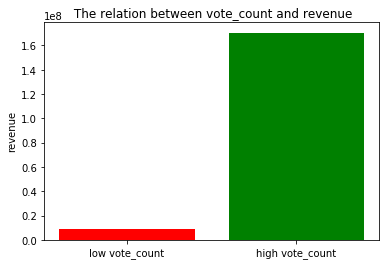

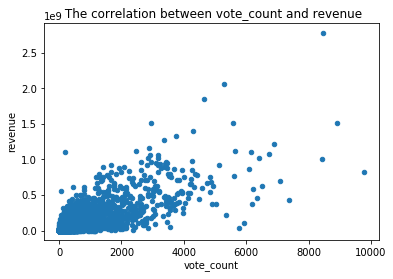

In [113]:
#using bar charts and scatter plots to compare between the vote count and the revenue.
plotting('revenue','vote_count')

# plots summary.

## 1- the histogram 
>It represents the relation between the two columns which are vote_counts and revenue and it shows that high vote counts gives high revenues
## 2- Scatter plot
> It reinforce the idea that the 2 columns of interest have high correlation

# Q.2 Is there a relation between the budget and the revenue?

In [114]:
#determing the correlation between the two columns to prove the point of relation.
df1['budget'].corr(df1['revenue'])

0.73485113100762522

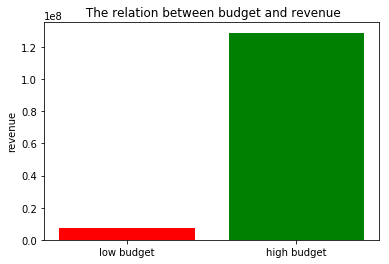

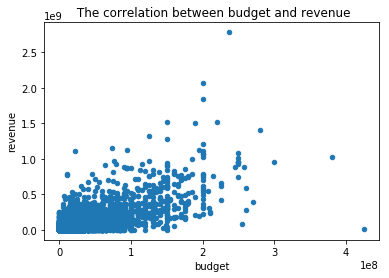

In [115]:
#using bar charts and scatter plots to compare between the vote count and the revenue
plotting('revenue','budget')

# plots summary.

## 1- the histogram 
>It represents the relation between the two columns which are budget and revenue and it shows that when increasing the budget gives high revenues
## 2- Scatter plot
> It reinforce the idea that the 2 columns of interest have high correlation

# Q3. Which genres are most popular from year to year?


In [116]:
#limiting the data columns to the columns of interest using the dependent value popularity and the 2 independent variabls which are the genres and the release_year
df_popular = df1.groupby(['genres','release_year'])[['popularity']].mean()

In [117]:
df_popular.head()

popularity
genres release_year            
Action 1976            0.126723
       1982            0.174119
       1985            0.092747
       1986            0.523347
       1988            1.392581

In [118]:
#Sorting the data columns to see the most popular data first then the less popular to limit our analysis
df2 = df_popular.sort_values('popularity', ascending=False)

In [119]:
df2.head()

,,popularity
genres,release_year,
Action|Adventure|Science Fiction|Thriller,2015,30.702849
Adventure|Drama|Science Fiction,2014,24.949134
Action|Science Fiction|Adventure,2014,14.311205
Adventure|Science Fiction|Thriller,2015,13.112507
Action|Adventure|Science Fiction,2014,12.971027


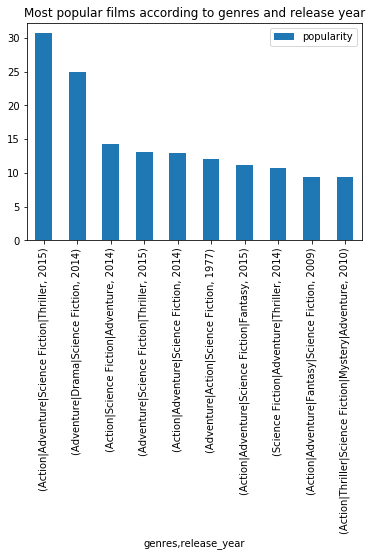

In [120]:
df2.iloc[0:10,:].plot(kind='bar' , title = 'Most popular films according to genres and release year')

# plot summary
>it was found the most popular genres is **Action|Adventure|Science Fiction|Thriller** in **2015**

<a id='conclusions'></a>
## Conclusions


## Q.1 Answer 
> As seen in the previous plots the budget and the revenue are positively correlated which really make sense as the numbers of vote counts increases this means that many people have watched the film which increases the revenue therefore there is a direct relation between budget and revenue at which high budget films has the greatest revenue.

## Q.2 Answer.
>As seen in the previous plots the budget and the revenue are positively correlated therefore there is a direct relation between budget and revenue at which high budget films has the greatest revenue.

## Q.3 Answer.
> we wanted to investigate the popularity of the film using its genres and release year data . and finally it was found the most popular genres is **Action|Adventure|Science Fiction|Thriller**
 

### limitations:
> data was hard to deal with as categories as there were many numerical numbers therefore I have divided the data into to halfs of high budget and low budget and computed the mean revenue for each of them for the first question . Same thing was done in the second question.
<br>
>However, while investigating the third question I firstly tried to plot all the relations between genres, year and popularity 
but due to the large number of categories in the genres column it was hard to plot it so I got the most popular 10 genreses
and plotted them to be able to visualize it.
